In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
from scipy import stats
from statsmodels.stats import multitest
import copy

In [3]:
from cycler import cycler

figure_path = '/home/jrowland/Documents/figures/s1s2_paper/0/'

def save_figure(name, base_path='/home/jrowland/mnt/qnap/Figures/josh_thesis'):
    plt.rcParams['pdf.fonttype'] = 42
    plt.savefig(os.path.join(base_path, f'{name}.pdf'), 
                bbox_inches='tight', transparent=True)

In [5]:
import popoff
from pop_off_functions import save_figure
import pop_off_plotting
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel

In [6]:
## put your path to your vape repo here 
path_to_vape = os.path.expanduser('~/Documents/code/Vape/')
popoff_path = '/home/jrowland/Documents/code/pop-off/scripts/'

# Bit hacky but oh well
sys.path.append(path_to_vape)
sys.path.append(os.path.join(path_to_vape, 'utils'))
sys.path.append(popoff_path)

from utils.utils_funcs import d_prime

In [7]:
from matplotlib import rcParams

params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

plt.rc("axes.spines", top=False, right=False) # despine

COLORS = [
'#228E5E', # Hit green
'#DB3713', # Miss red
]

## MAKE THE FONT SIZE 20 or 21
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 14


rcParams.update(params)


In [8]:
msm = MultiSessionModel(remove_targets=False, subsample_sessions=False,
                         remove_toosoon = True)


long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [9]:
msm.sessions

{0: instance Mouse J064, run 10 of Session class,
 1: instance Mouse J064, run 11 of Session class,
 2: instance Mouse J064, run 14 of Session class,
 3: instance Mouse RL070, run 28 of Session class,
 4: instance Mouse RL070, run 29 of Session class,
 5: instance Mouse RL117, run 29 of Session class,
 6: instance Mouse RL117, run 30 of Session class,
 7: instance Mouse RL123, run 22 of Session class,
 8: instance Mouse RL116, run 32 of Session class,
 9: instance Mouse RL116, run 33 of Session class}

<Figure size 7200x7200 with 0 Axes>

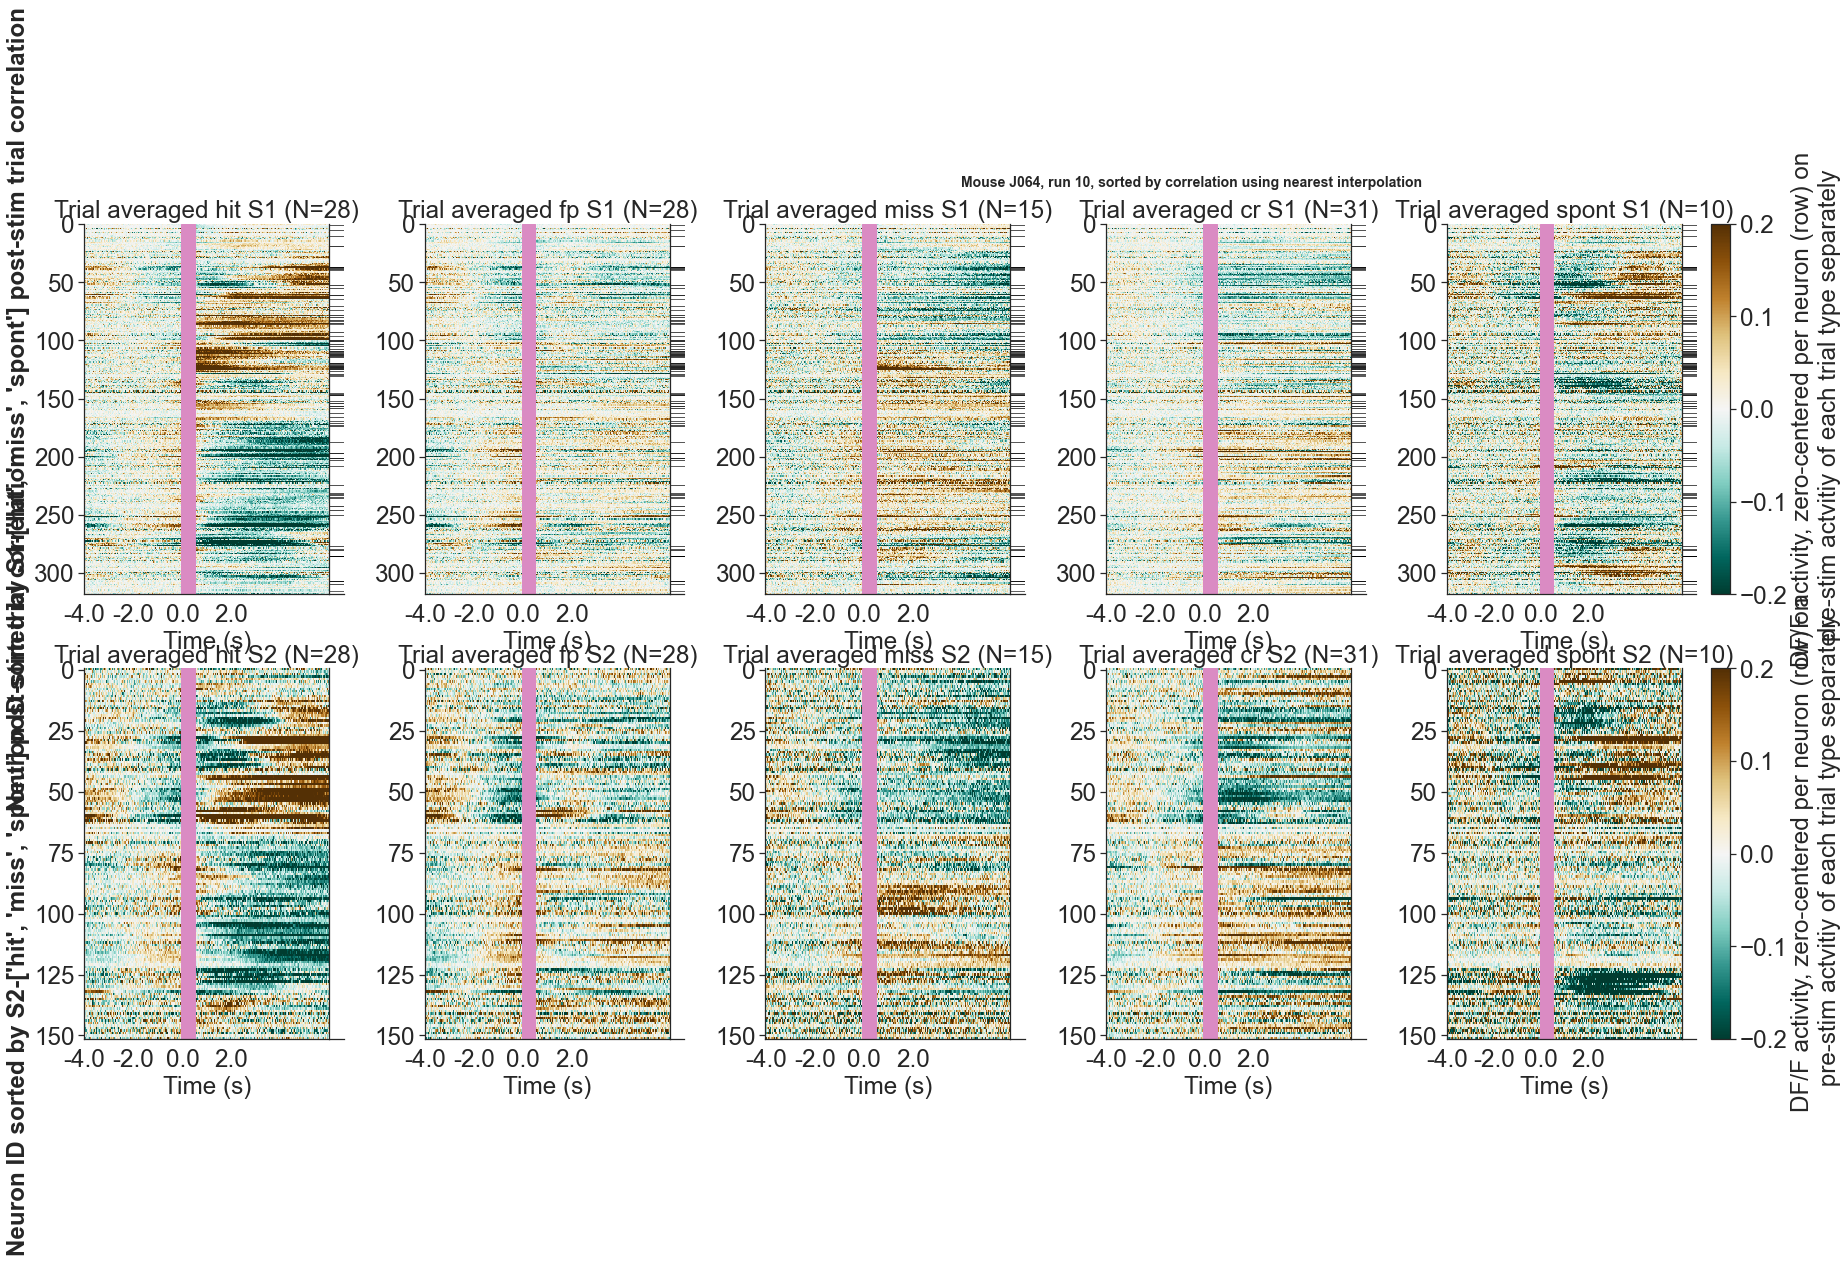

In [18]:
plt.figure(figsize=(100,100))
_ = pop_off_plotting.plot_raster_plots_trial_types_one_session(session, sort_tt_list=['hit', 'miss', 'spont'], sorting_method='correlation')
save_figure('Figure2MATCHEDsorting_raster_bois', figure_path)

/home/jrowland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


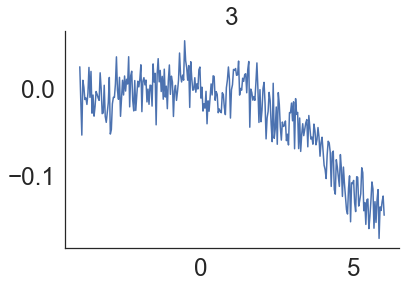

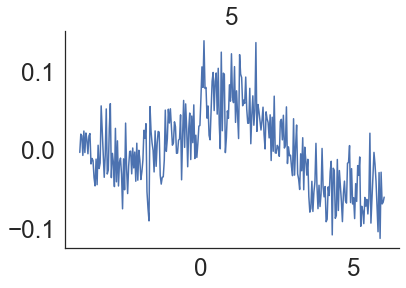

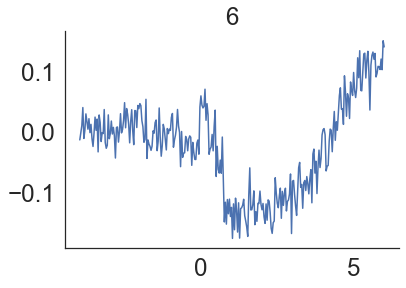

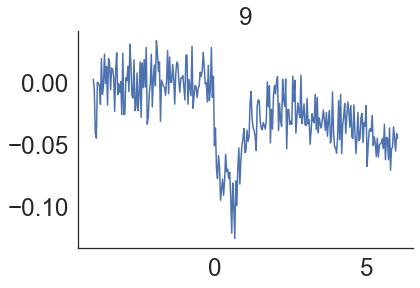

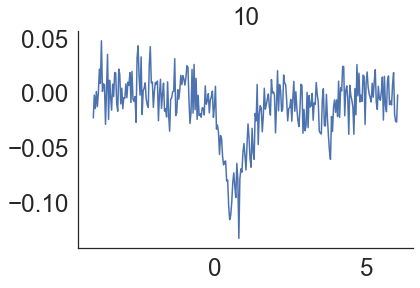

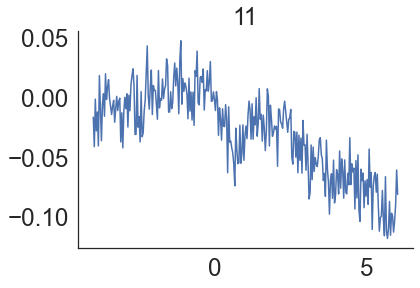

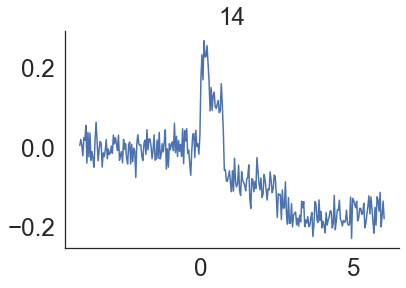

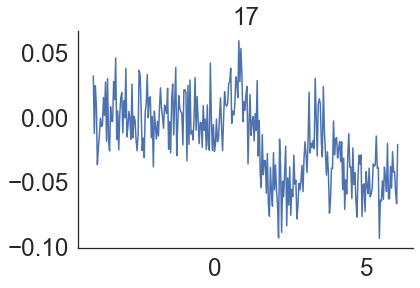

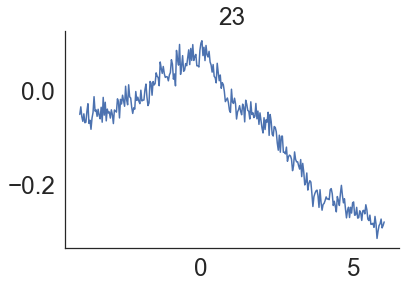

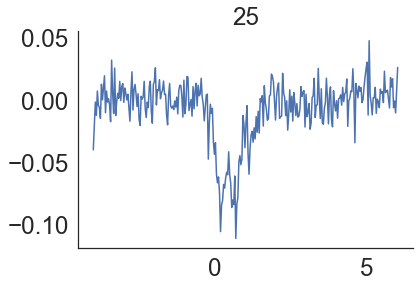

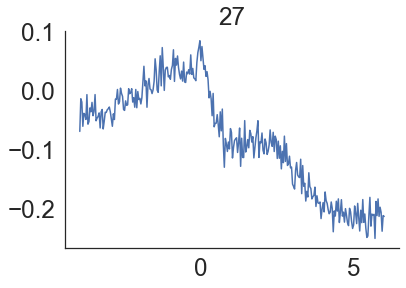

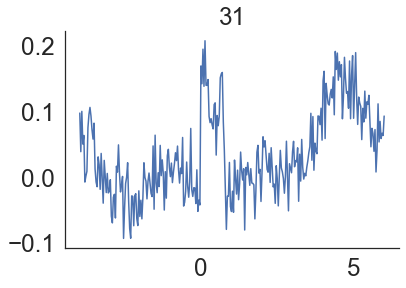

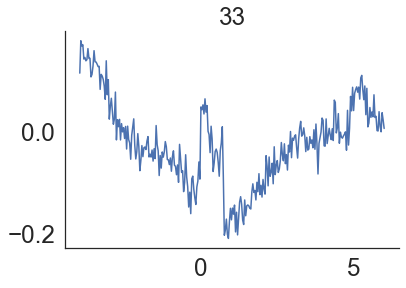

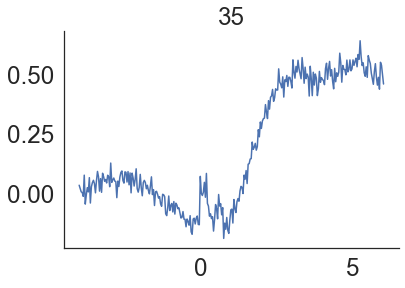

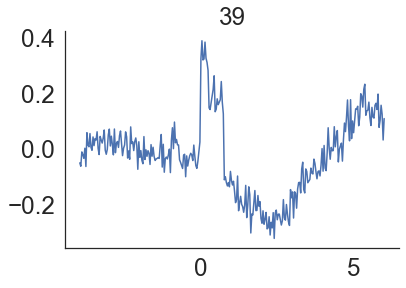

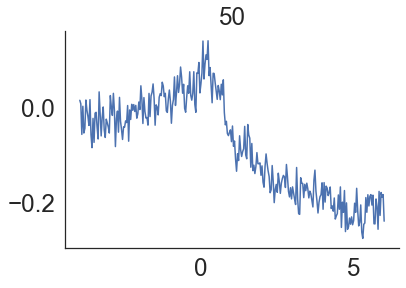

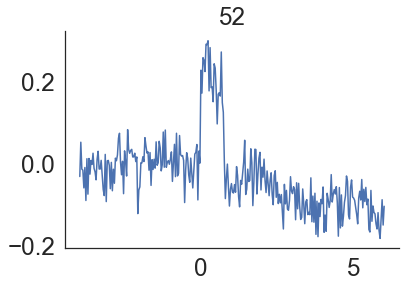

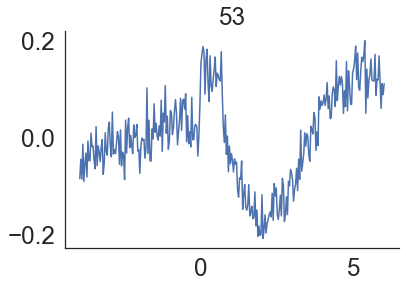

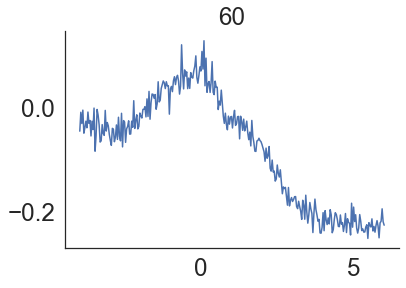

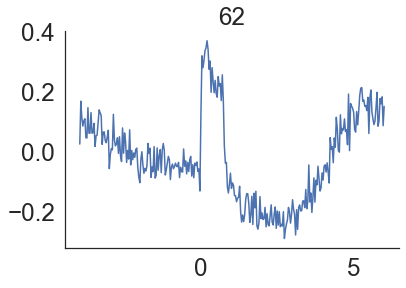

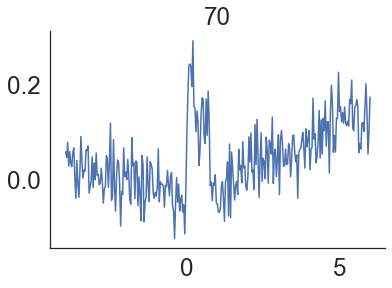

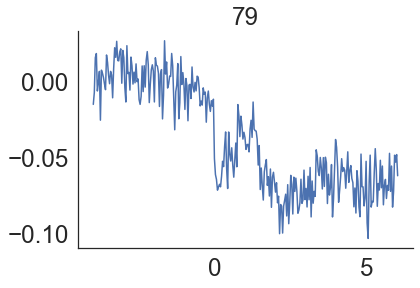

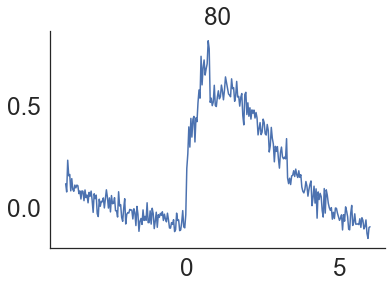

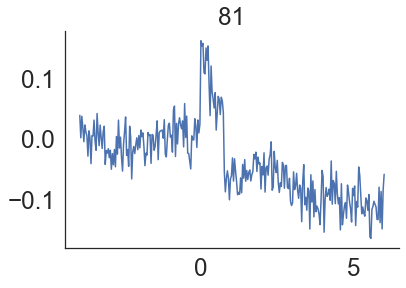

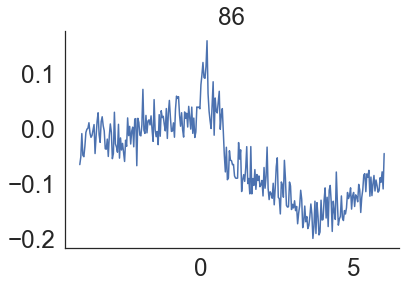

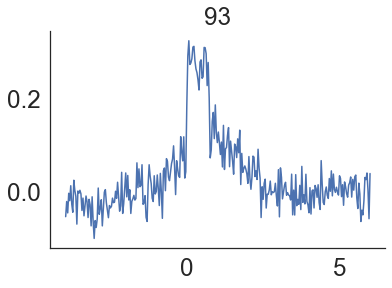

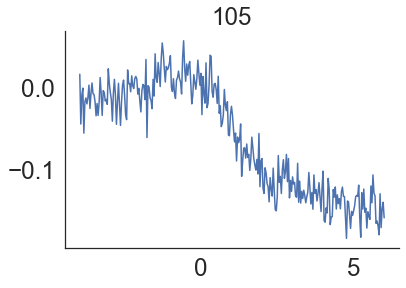

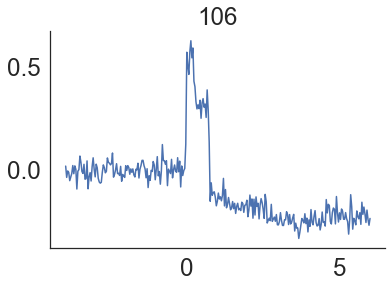

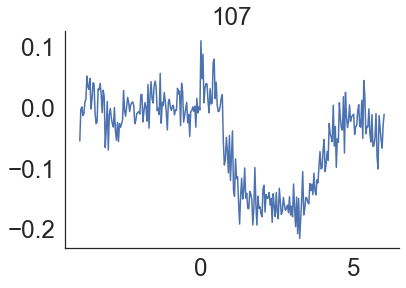

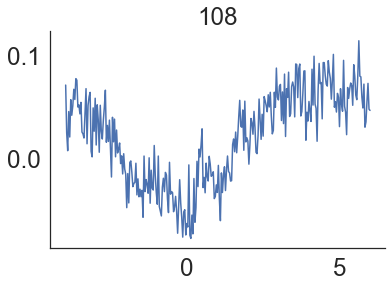

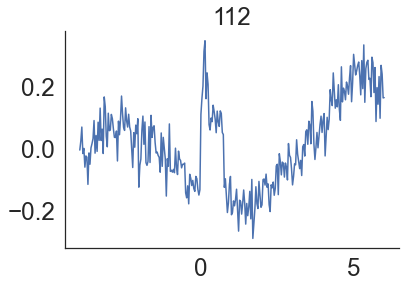

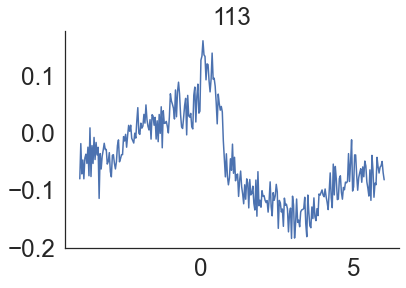

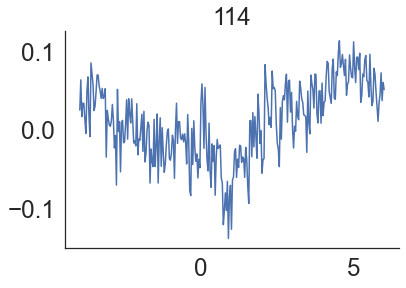

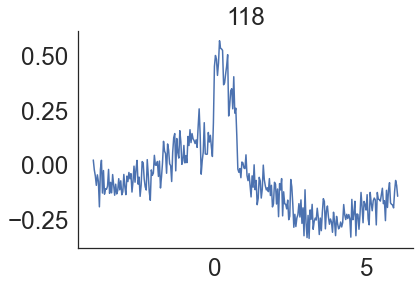

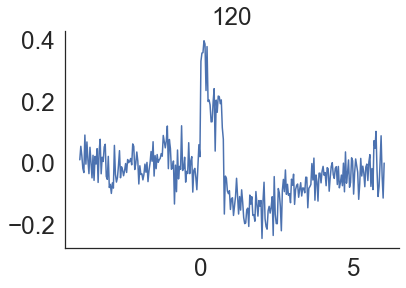

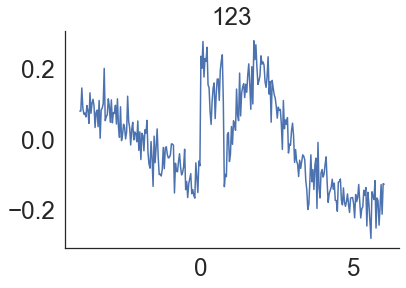

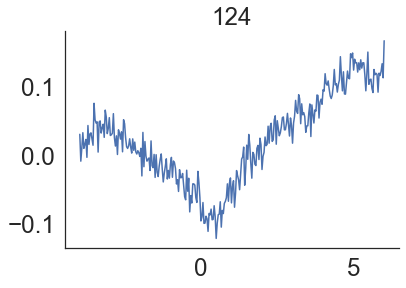

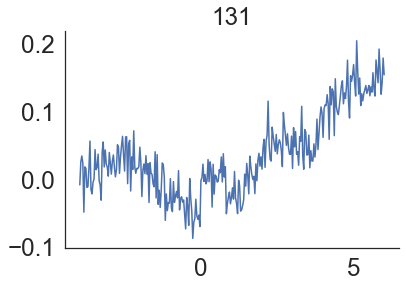

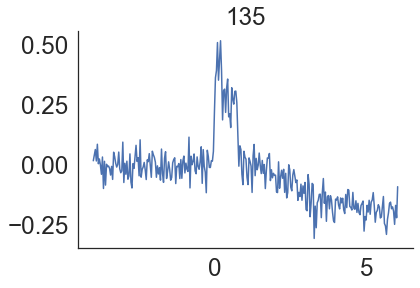

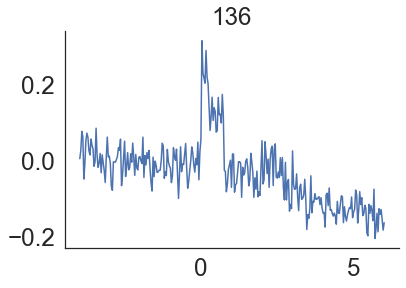

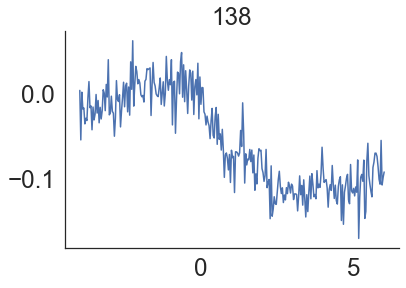

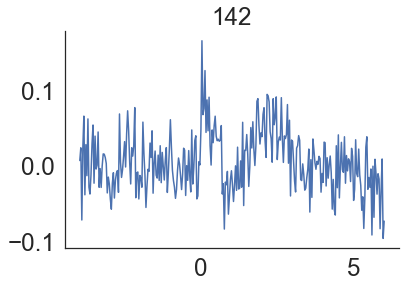

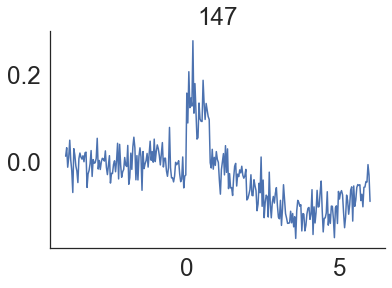

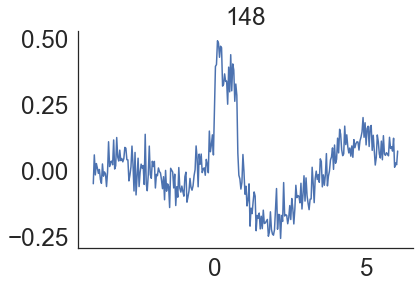

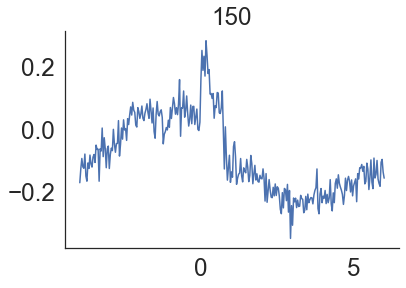

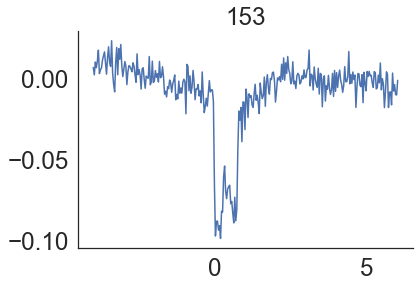

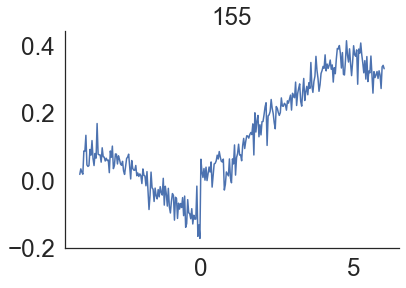

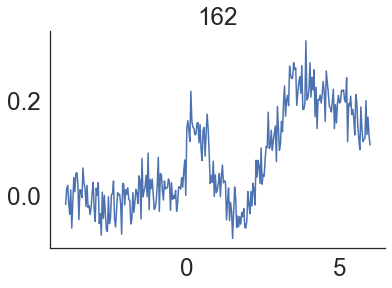

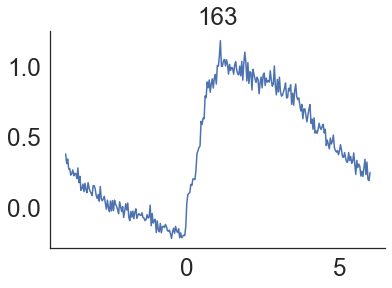

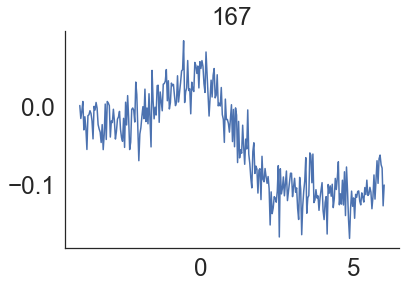

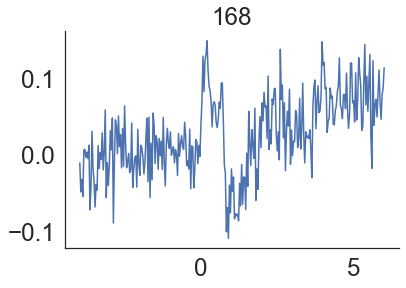

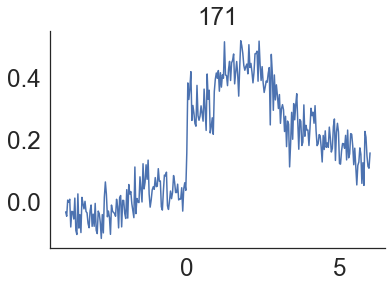

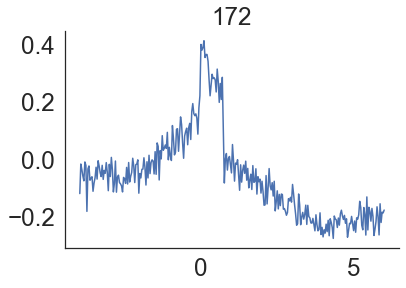

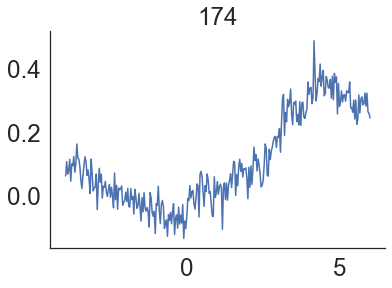

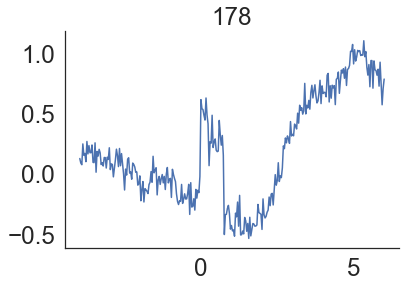

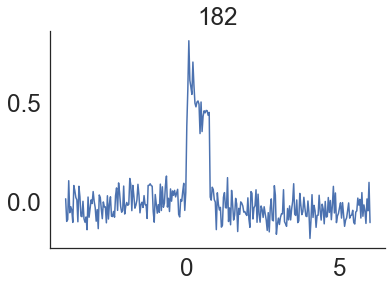

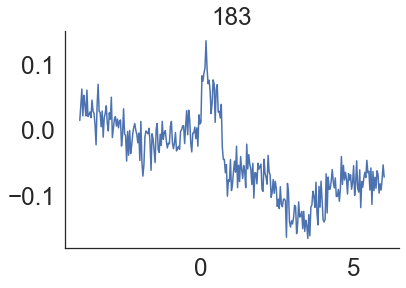

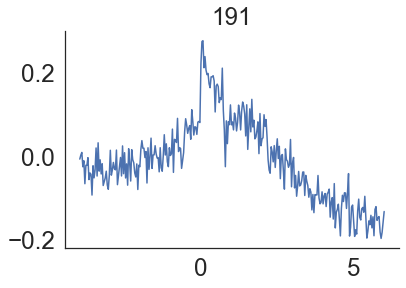

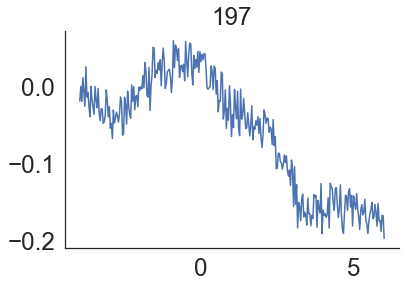

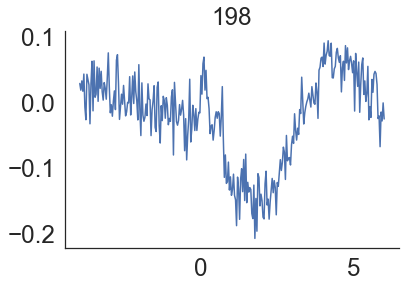

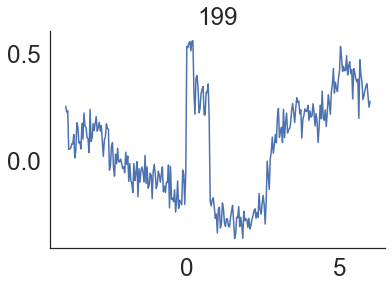

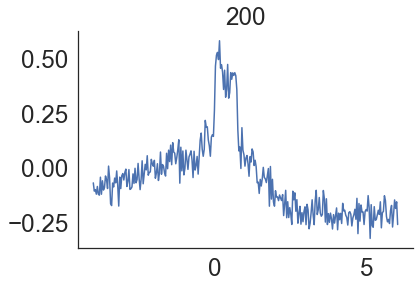

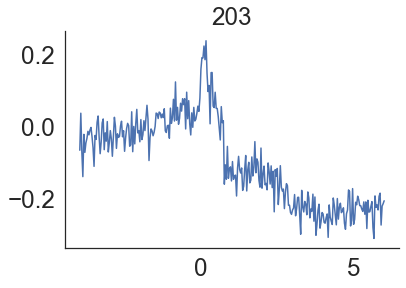

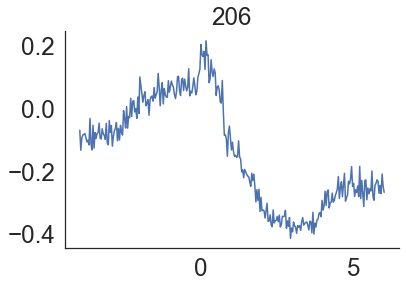

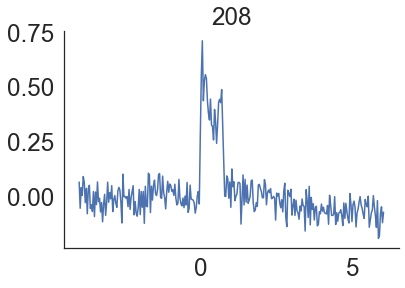

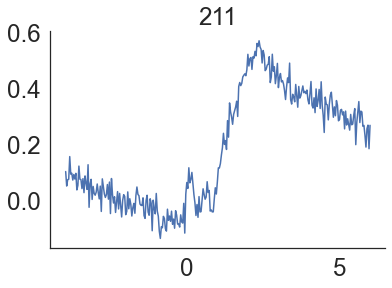

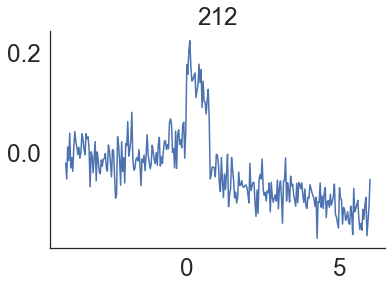

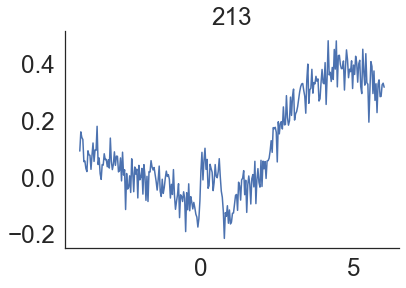

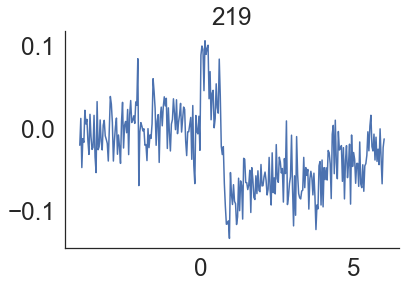

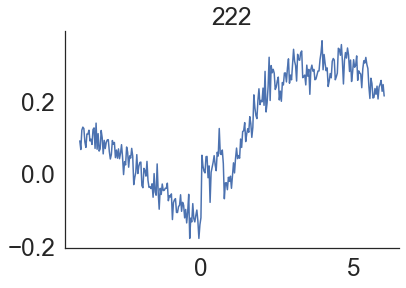

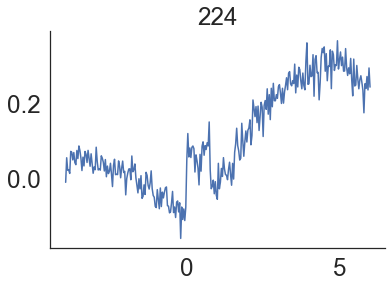

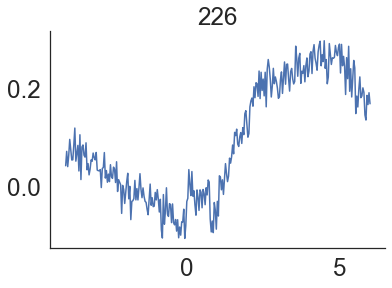

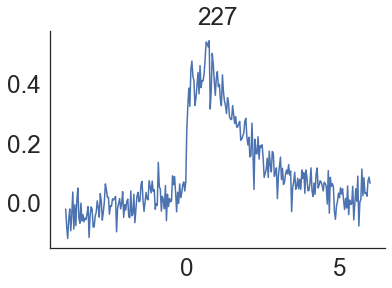

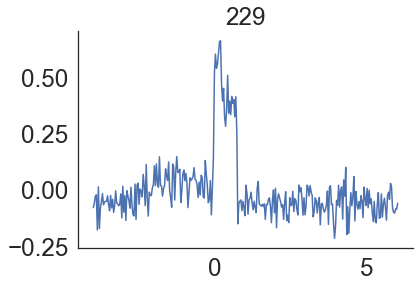

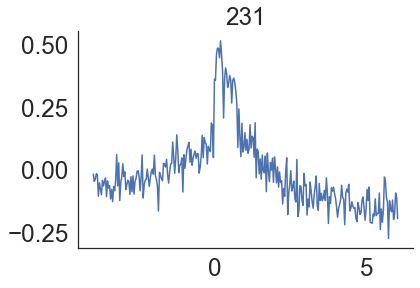

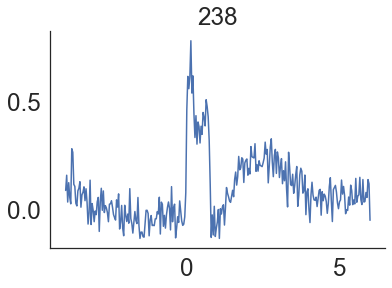

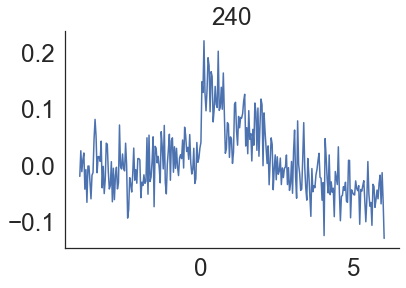

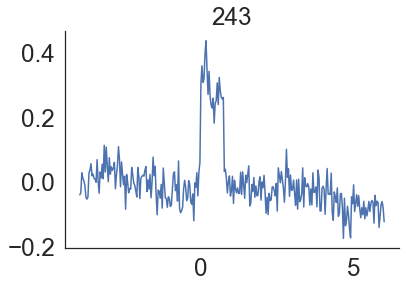

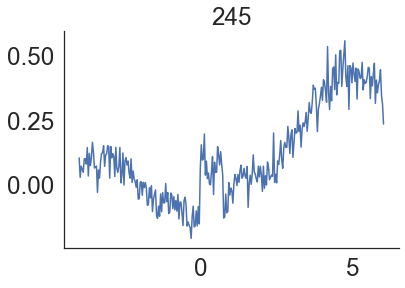

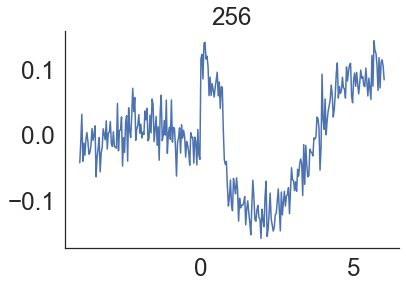

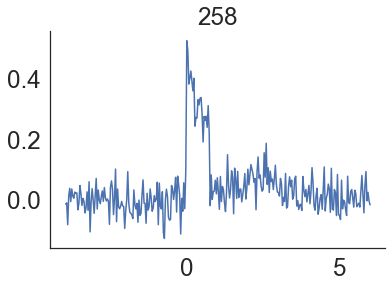

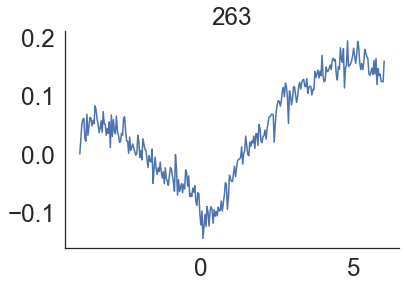

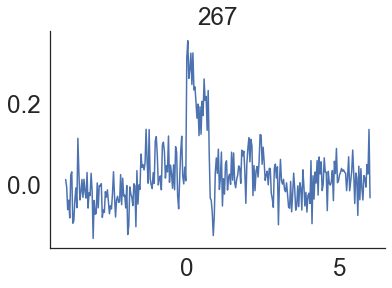

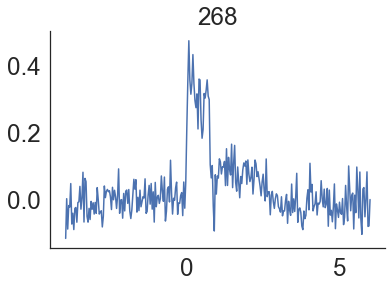

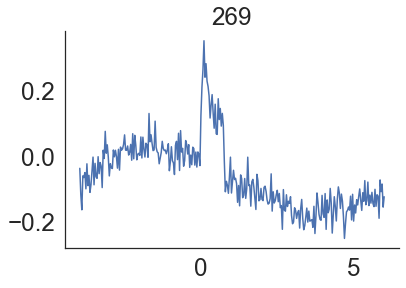

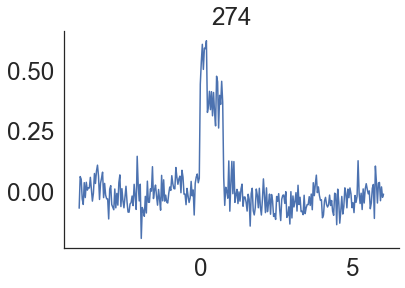

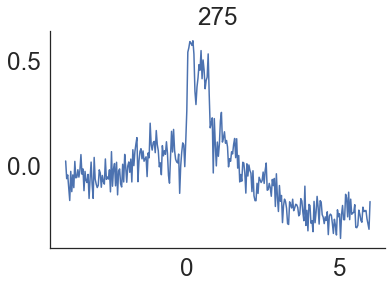

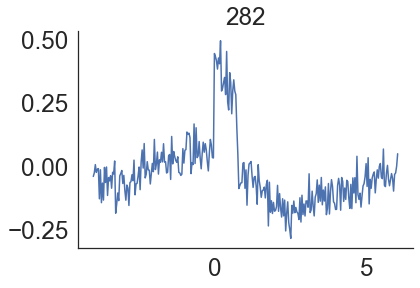

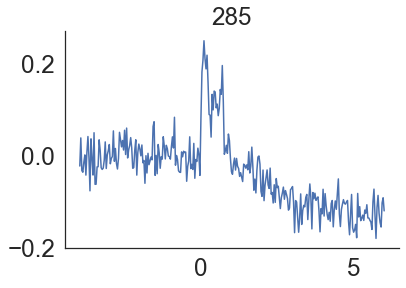

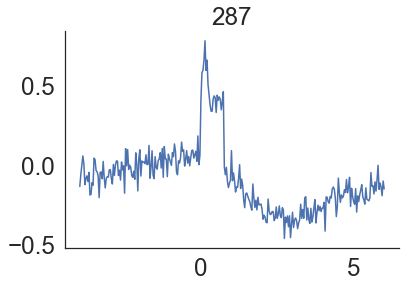

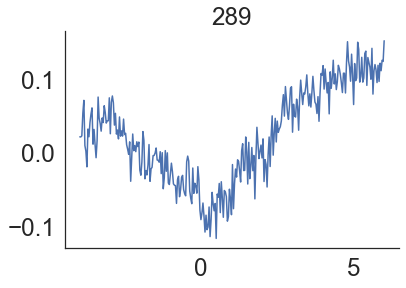

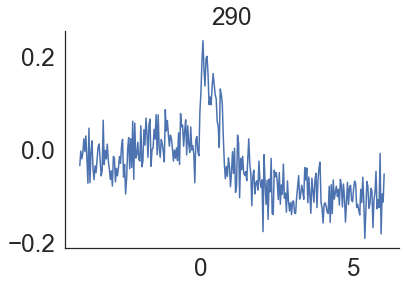

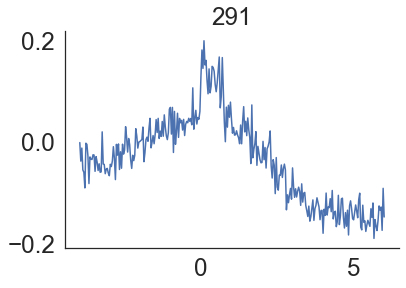

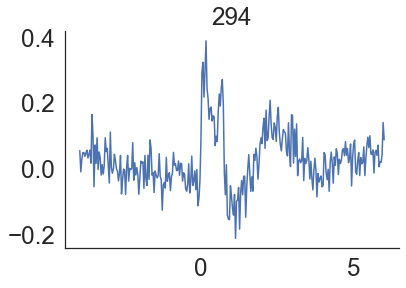

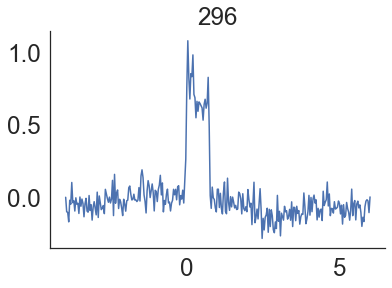

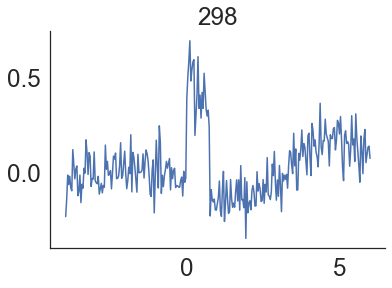

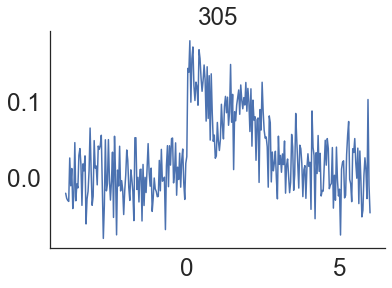

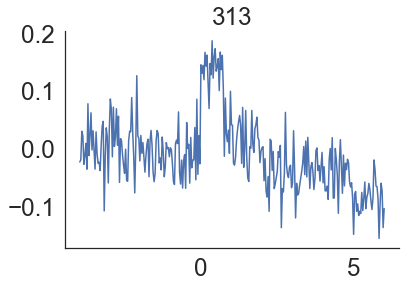

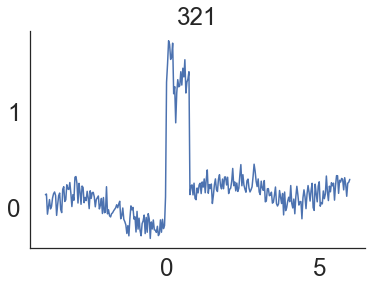

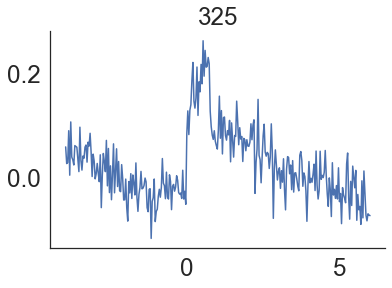

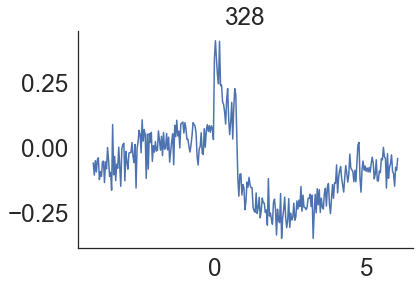

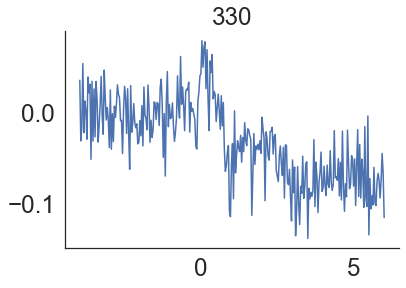

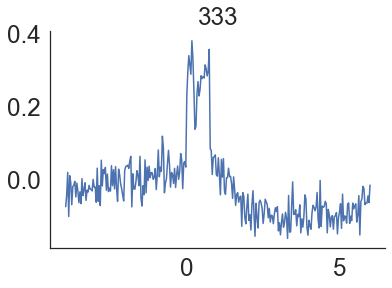

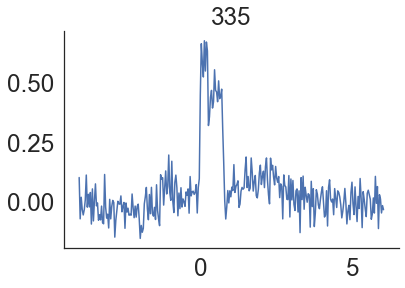

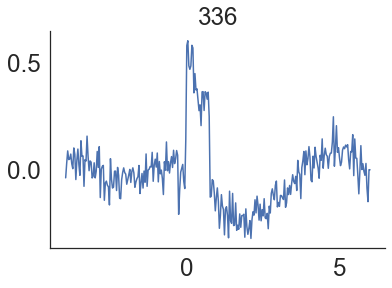

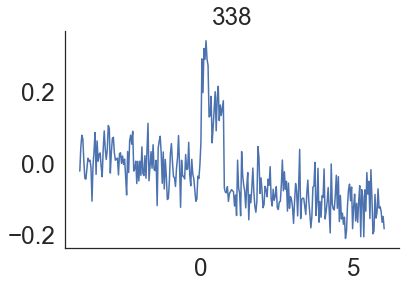

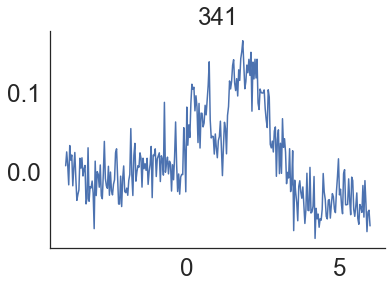

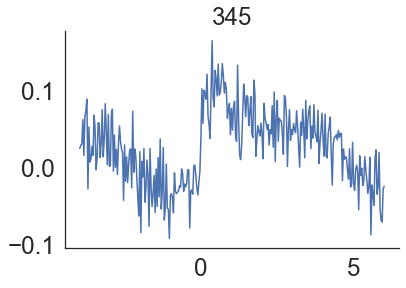

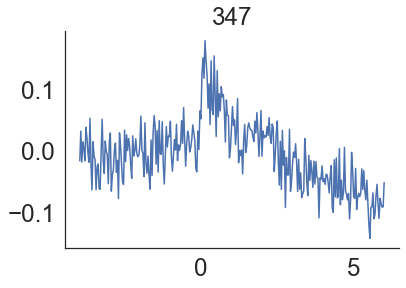

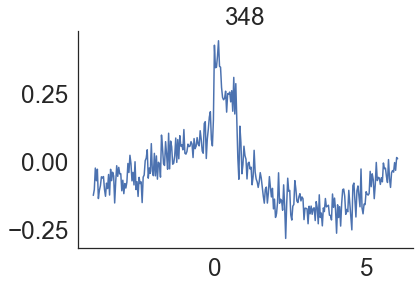

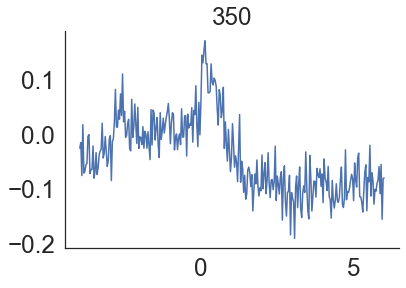

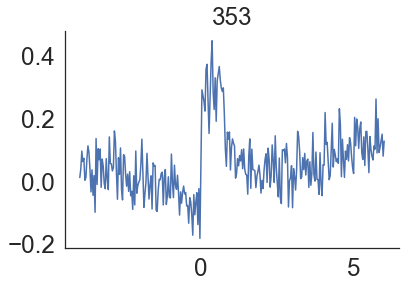

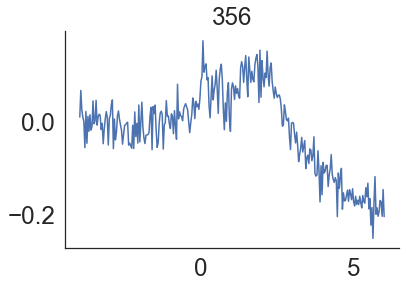

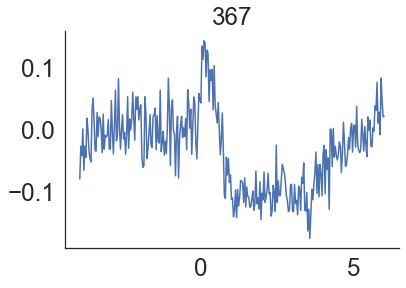

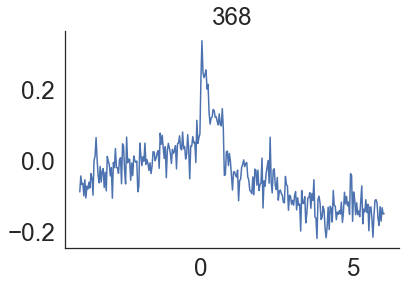

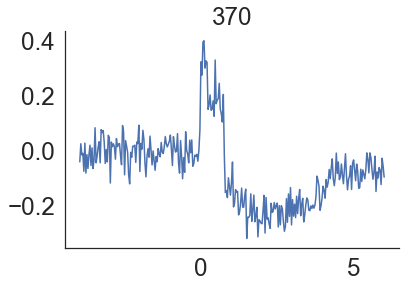

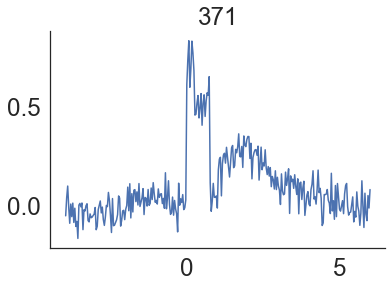

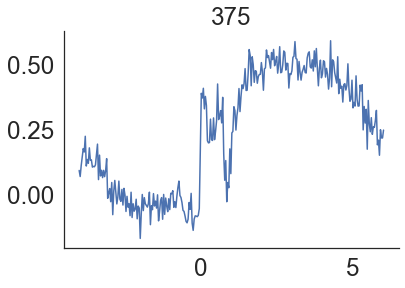

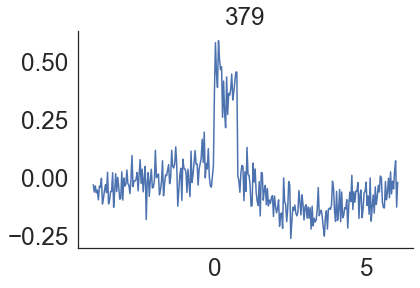

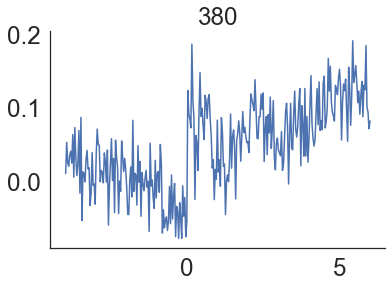

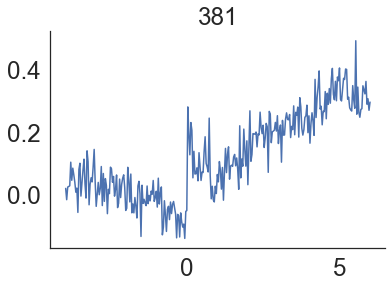

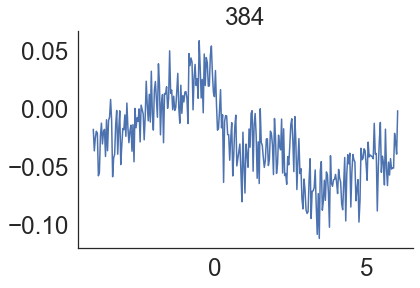

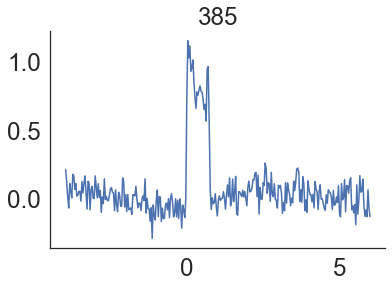

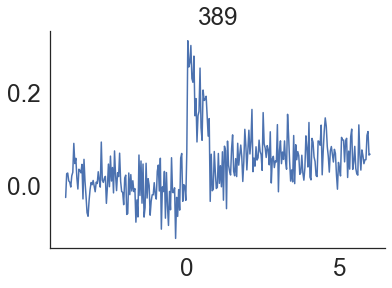

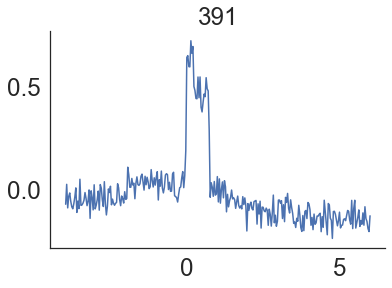

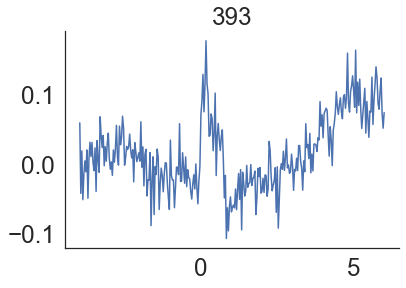

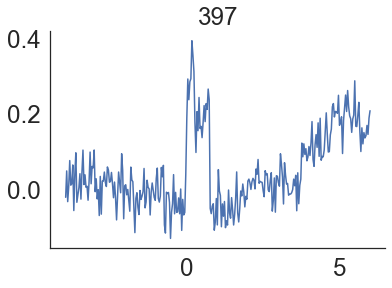

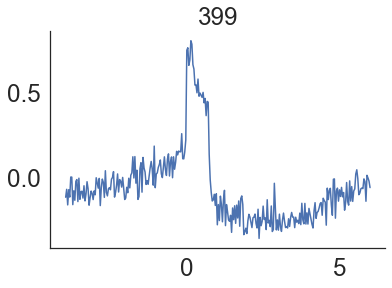

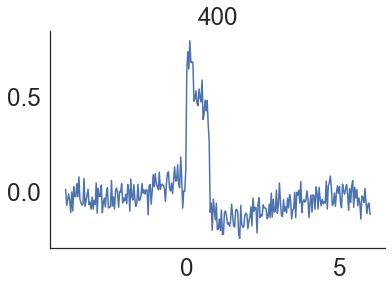

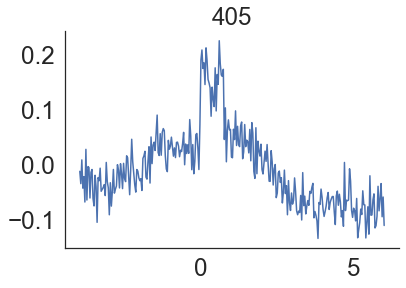

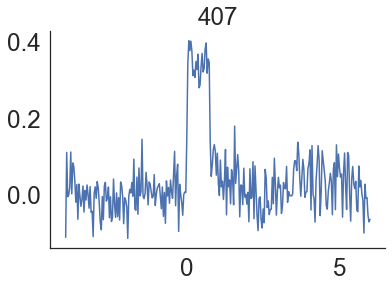

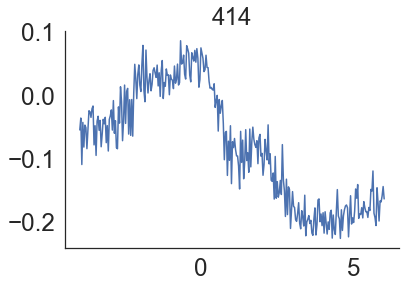

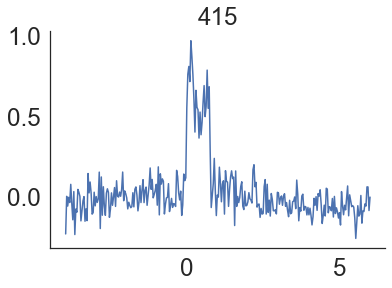

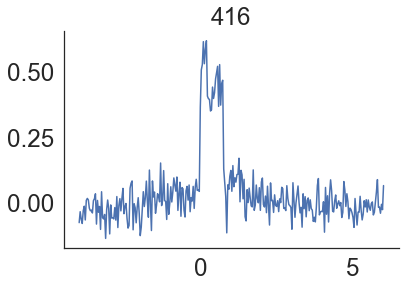

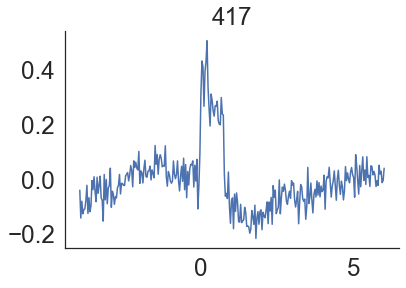

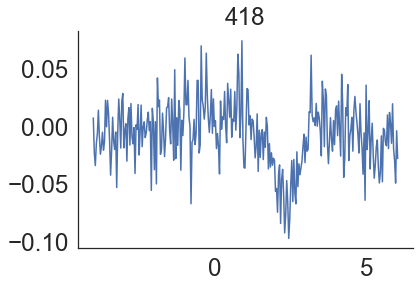

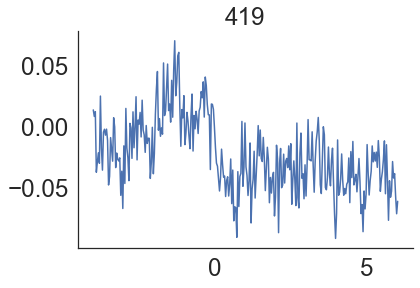

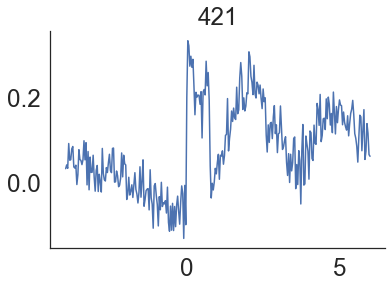

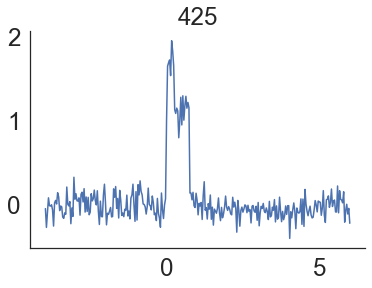

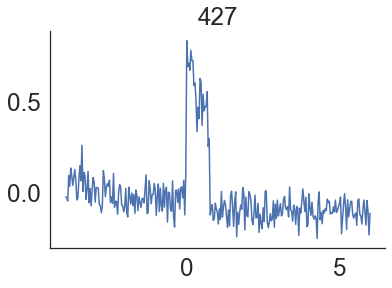

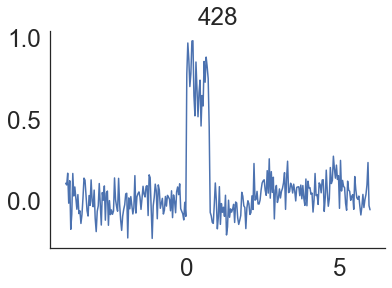

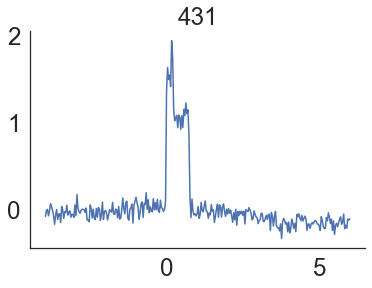

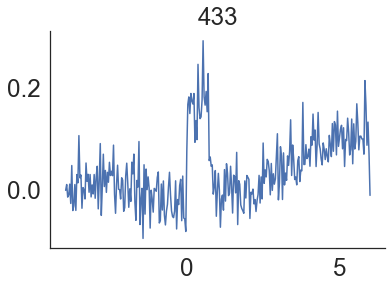

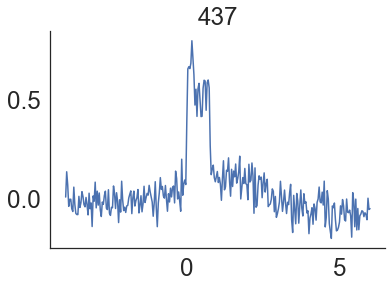

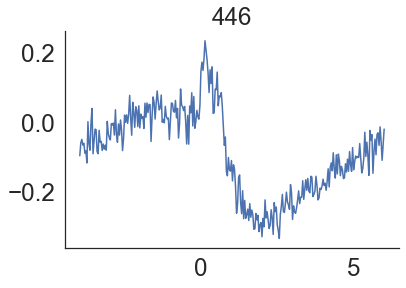

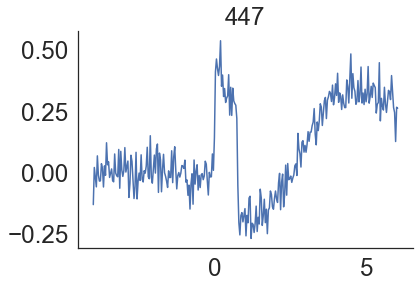

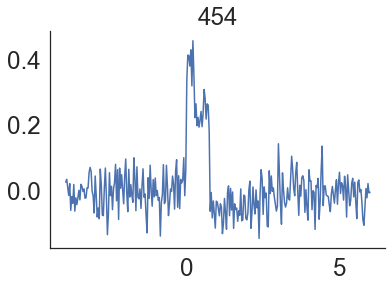

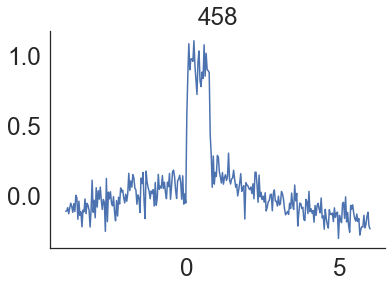

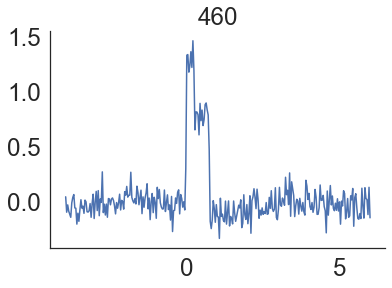

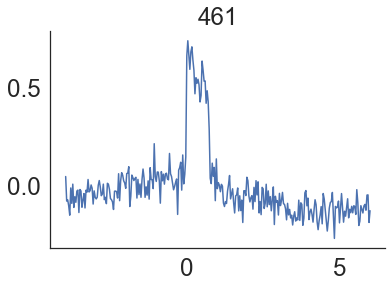

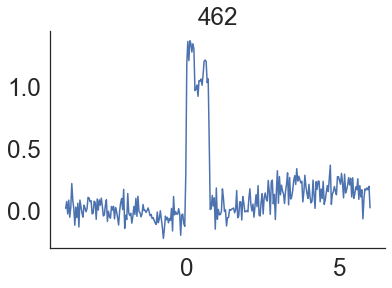

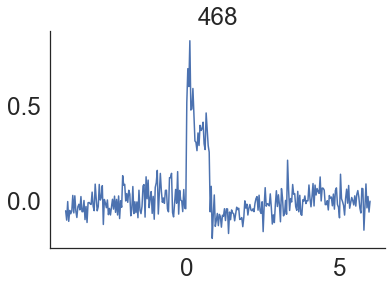

In [13]:

n_s2 = sum(session.s2_bool)
x_axis = session.filter_ps_time
plot_row = 117 # Where is the cell on the plot
for plot_row in np.arange(0,  n_s2):

    # Index of S2 cells in combined matrix
    cell_id = np.where(session.s2_bool)[0][plot_row]
    arr = session.behaviour_trials[cell_id, :, :]
    arr = arr[session.outcome=='hit', :]
    
    baseline = np.mean(arr[:, :session.pre_frames], 1)
    arr = np.subtract(arr.T, baseline).T

    plt.figure()
    plt.title(cell_id)
    
    plt.plot(x_axis, np.mean(arr, 0))

In [19]:
cell_id = np.where(session.s2_bool)[0][10]
cell_id

27

In [20]:
def single_cell_plot(session, cell_id, tt=['hit'], smooth_window=10):
    
    if tt[0] == 'prereward':
        arr = session.pre_rew_trials[cell_id, :, :]
    else:
        arr = session.behaviour_trials[cell_id, :, :]
        trial_idx = np.logical_and(np.isin(session.outcome, tt), session.photostim==1)
        arr = arr[trial_idx, :]
    
    baseline = np.mean(arr[:, :session.pre_frames], 1)
    arr = np.subtract(arr.T, baseline).T
    
    x_axis = copy.deepcopy(session.filter_ps_time)
    
    remove_photostim = np.logical_or(x_axis < -0.07,
                                     x_axis > 0.5)
    
    x_axis[~remove_photostim] = np.nan
    
    start_box = x_axis[min(np.where(np.isnan(x_axis)))[0]-1]
    end_box = x_axis[max(np.where(np.isnan(x_axis)))[0]]
    end_box = x_axis[max(np.where(np.isnan(x_axis))[0])+1] - 1/30
#     print(start_box)
#     print(end_box)
#     1/0
    

    for trial in arr:
        trial = smooth_trace(trial, smooth_window)
        plt.plot(x_axis, trial, alpha=1)
        
    meaned = smooth_trace(np.mean(arr, 0), smooth_window)
    plt.axvspan(start_box, end_box, alpha=0.5, color=sns.color_palette()[6])
    plt.plot(x_axis, meaned, color='black', linewidth=4)
    plt.xlim(-2, 7)
    
    return arr

In [21]:
def smooth_trace(trace, window_size=3):
    
    ''' Inefficient but gives control over window position. 
        Averages window_size back in time to avoid averaging
        into artifact
        '''
    smoothed = np.zeros(len(trace))
    for idx in range(window_size, len(trace)):
        smoothed[idx] = np.mean(trace[idx-window_size:idx])
    return smoothed

Text(0.5, 0, 'Time (s)')

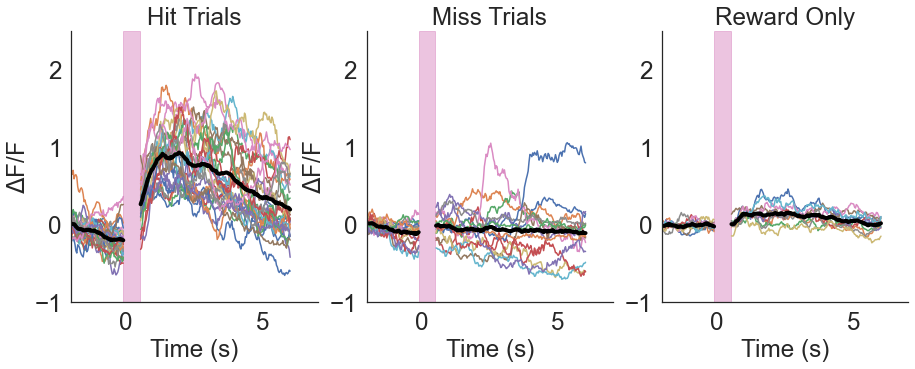

In [22]:
## J064 run 10 cell 77 is a magic cell on hit trials
# It's now cell 80 

## 154 is the same but a bit cleaner but 77 doesnt 
## respond to spont rew
# for cell_id in range(200):
cell_id = 163

plt.figure(figsize=(15,5))

ylims = (-1, 2.5)

plt.subplot(1,3,1)
arr = single_cell_plot(session, cell_id,  tt=['hit'])
plt.ylim(*ylims)
plt.title('Hit Trials')
plt.ylabel(r'$\Delta$F/F')
plt.xlabel('Time (s)')

plt.subplot(1,3,2)
arr = single_cell_plot(session, cell_id,  tt=['miss'])
plt.ylim(*ylims)
plt.title('Miss Trials')
plt.ylabel(r'$\Delta$F/F')
plt.xlabel('Time (s)')

plt.subplot(1,3,3)
arr = single_cell_plot(session, cell_id,  tt=['prereward'])
plt.ylim(*ylims)
plt.title('Reward Only')
plt.xlabel('Time (s)')

save_figure('Figure2ExcitedCell', figure_path)

Text(0.5, 0, 'Time (s)')

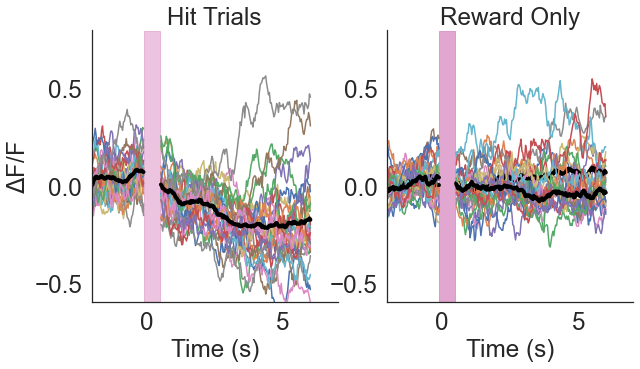

In [23]:
# 403 has a big inhibitory event but also a bit on the spont
# 378 is decent
# 316 is very good but not perfect same with 302
# 192 good



cell_id = 414

plt.figure(figsize=(15, 5))
ylims = (-0.6, 0.8)

plt.subplot(1,3,1)
arr = single_cell_plot(session, cell_id, tt=['hit'])
plt.ylim(*ylims)
plt.title('Hit Trials')
plt.ylabel(r'$\Delta$F/F')
plt.xlabel(f'Time (s)')

plt.subplot(1,3,2)
arr = single_cell_plot(session, cell_id, tt=['miss'])
plt.ylim(*ylims)
plt.title('Miss Trials')
plt.xlabel(f'Time (s)')

plt.subplot(1,3,2)
arr = single_cell_plot(session, cell_id, tt=['prereward'])
plt.ylim(*ylims)
plt.title('Reward Only')
plt.xlabel('Time (s)')

save_figure('Figure2InhibitedCell', figure_path)


In [27]:
def get_percent_cells_responding(session, region, direction='positive', prereward=False):

    # 0.015 gives you 5% of cells responding (positive + negative)
    # on cr (for session 0)
    # Get me for 5% across all 
    fdr_rate = 0.015

    if not prereward:
        flu = session.behaviour_trials
    else:
        flu = session.pre_rew_trials
        
    times_use = session.filter_ps_time
    
    if region == 's1':
        flu = flu[session.s1_bool, :, :]
    elif region == 's2':
        flu = flu[session.s2_bool, :, :]
    
    percent_cells_responding = []
    
    magnitude = []

    for trial_idx in range(flu.shape[1]):

        # Haven't built this for 5 Hz data
        assert session.mouse not in ['J048', 'RL048']

        trial = flu[:, trial_idx, :]

        # 500 ms before the stim with a nice 
        # juicy buffer to the artifact just in case
        pre_idx = np.where(times_use < -0.15)[0][-15:]  

        # You can dial this back closer to the artifact if you cut out 150
        post_idx = np.logical_and(times_use > 1, times_use <= 1.5)
        
        pre_array = trial[:, pre_idx]
        post_array = trial[:, post_idx]
        
        p_vals = [stats.wilcoxon(pre, post)[1] for pre, post in zip(pre_array, post_array)]
        p_vals = np.array(p_vals)
        
        sig_cells, correct_pval, _, _ = multitest.multipletests(p_vals, alpha=fdr_rate, method='fdr_bh',
                                                            is_sorted=False, returnsorted=False)
        
        # This doesn't split by positive and negative
#         percent_cells_responding.append(sum(sig_cells))
        
        positive = np.mean(post_array, 1) > np.mean(pre_array, 1)
        negative = np.logical_not(positive)
        
        
        if direction == 'positive':
            percent_cells_responding.append(sum(np.logical_and(sig_cells, positive)))
            magnitude.append(
                np.sum(np.mean(post_array[positive, :], 1) - 
                        np.mean(pre_array[positive, :] , 1))
            )
        else:
            percent_cells_responding.append(sum(np.logical_and(sig_cells, negative)))
        
            magnitude.append(
                np.sum(np.mean(post_array[negative, :], 1) - 
                        np.mean(pre_array[negative, :] , 1))
            )
        
    if region == 's1':
        n = sum(session.s1_bool)
    elif region == 's2':
        n = sum(session.s2_bool)
        
    percent_cells_responding = np.array(percent_cells_responding) / n * 100
    
    assert len(percent_cells_responding) == flu.shape[1]
    assert len(magnitude) == flu.shape[1]
    return percent_cells_responding
#     return np.array(magnitude)

In [28]:
session = msm.linear_models[0].session

In [25]:
# pos = get_percent_cells_responding(msm.linear_models[0].session, 's2',
#                                    direction='positive', prereward=False)

# neg = get_percent_cells_responding(msm.linear_models[0].session, 's2',
#                                    direction='negative', prereward=False)
# # 
# np.mean(pos[session.outcome=='cr']) + np.mean(neg[session.outcome=='cr'])

In [29]:
# Used to set the alpha, should be on average across sesssion 5% of cells responding to cr trials

cr_responders = []
for session_idx in range(len(msm.linear_models)):

    session = msm.linear_models[session_idx].session
    
    n_responders = get_percent_cells_responding(session, 's2', direction='positive', prereward=False)
    cr_positive = np.mean(n_responders[session.outcome=='cr'])
    
    n_responders = get_percent_cells_responding(session, 's2', direction='negative', prereward=False)
    cr_negative = np.mean(n_responders[session.outcome=='cr'])
    
    cr_responders.append(
        cr_positive + cr_negative
    )

In [30]:
np.mean(cr_responders)

4.797469723413486

In [31]:
def transfer_dict(msm, region, direction='positive'):

    hitty = {}
    missy = {}

    for session_idx in range(len(msm.linear_models)):

        session = msm.linear_models[session_idx].session
        n_responders = get_percent_cells_responding(session, region, direction=direction)

#         for n_cells in [[5,10], [20,30], [40,50], 150]:
        for n_cells in [[5], [10], [20], [30], [40], [50], [150]]:
            idx = np.isin(session.trial_subsets, n_cells)
            idx_miss = np.logical_and(idx, session.outcome=='miss')
            idx_hit = np.logical_and(idx, session.outcome=='hit')

            centre_cells = np.mean(n_cells)

            if centre_cells not in hitty:
                hitty[centre_cells] = [np.mean(n_responders[idx_hit])]
                missy[centre_cells] = [np.mean(n_responders[idx_miss])]
            else:
                hitty[centre_cells].append(np.mean(n_responders[idx_hit]))
                missy[centre_cells].append(np.mean(n_responders[idx_miss]))
        
    return hitty, missy

In [32]:
def plot_transfer_function(data, color, label=None):
    
    fit_x = []
    fit_y = []
    
    for key, val in data.items():

        x = np.repeat(key, len(val))
        y = np.array(val)
        
        # Need to take a nan out where there's no misses of some cell number
        nn = np.where(~np.isnan(y))
        x = x[nn]
        y = y[nn]

        fit_x.extend(x)
        fit_y.extend(y)

        plt.plot(x, y, '.', color=color, markersize=8)
        
        sem = np.std(y) / np.sqrt(len(y)) * 1.96
        
        plt.errorbar(key, np.mean(y), yerr=sem, color=color,
                     markersize=20, label=label, capsize=8, fmt='.')
    
        label = None

    fit_x = np.array(fit_x)    
    fit_y = np.array(fit_y)    
    
    slope, intercept, r, p, se = stats.linregress(fit_x, fit_y)
    plt.plot(fit_x, fit_x * slope + intercept, color=color)
    print(label)
    print(f'r={r}')
    print(f'p={p}')
    print('\n')
    
    plt.legend()
    
#     plt.xscale('log')

In [33]:
def plot_spont(region, direction):

    
    n_responders = []
    for session_idx in range(len(msm.linear_models)):

        session = msm.linear_models[session_idx].session
        
        n_responders.append(
            
            np.mean(get_percent_cells_responding(session, region, direction,
                                         prereward=True))
        )
        
    meaned = np.mean(n_responders)
    sem = np.std(n_responders) / np.sqrt(len(n_responders))
    plt.fill_between([7.5, 150], [meaned-sem, meaned-sem], [meaned+sem, meaned+sem], 
                     color=sns.color_palette()[2])
    

/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


None
r=0.6212912294789577
p=1.574271169877841e-08


None
r=0.6643806070891437
p=8.795850980679928e-10




/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


None
r=0.5426431598229378
p=1.7499088223554095e-06


None
r=0.5614649344948534
p=7.696847356977467e-07




/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


None
r=0.018069104906065232
p=0.8837231745792318


None
r=0.2879327615188053
p=0.018139764592857426




/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


None
r=0.3739417993293867
p=0.0016823552032711787


None
r=0.42306378727710675
p=0.00036135232007480044




/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.0, 10.0)

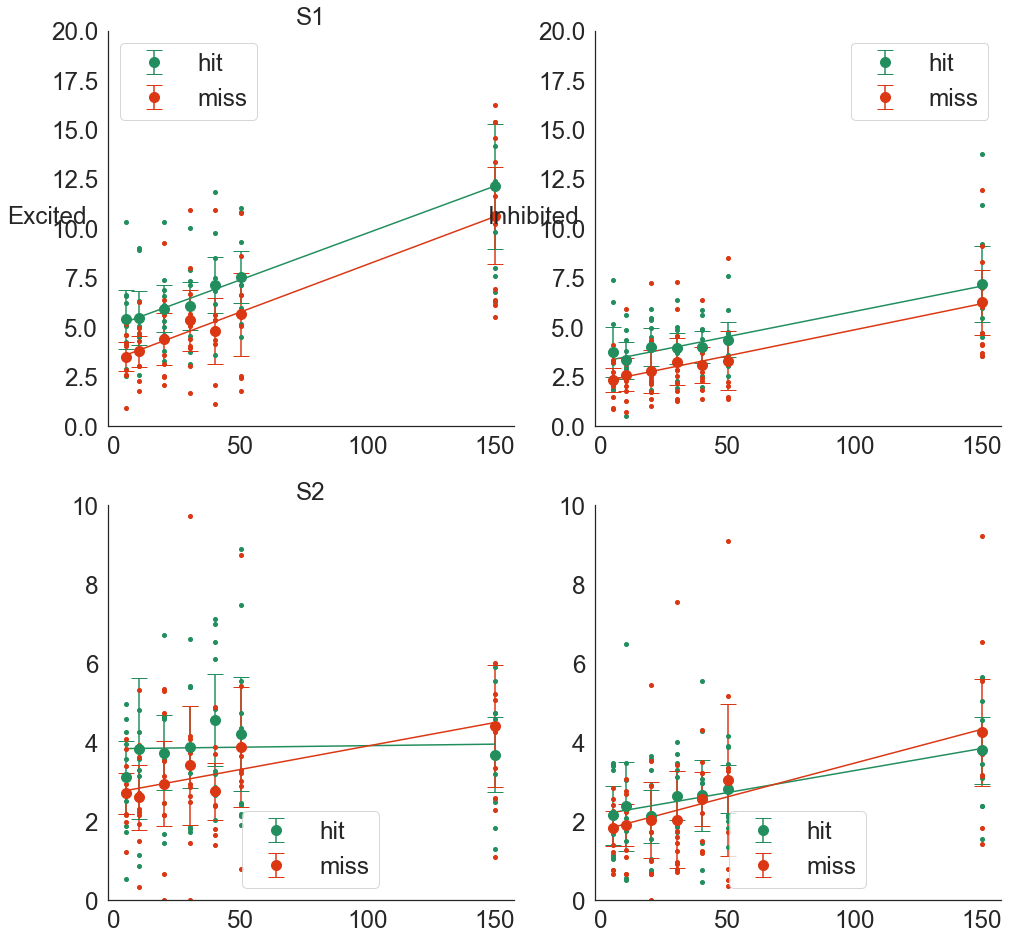

In [34]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
hitty, missy = transfer_dict(msm, 's1', direction='positive')
plot_transfer_function(hitty, color=COLORS[0], label='hit')
plot_transfer_function(missy, color=COLORS[1], label='miss')
plot_spont('s1', 'positive')
plt.title('S1')
plt.ylabel('Excited', rotation=0)
plt.ylim(0,20)

plt.subplot(2,2,2)
hitty, missy = transfer_dict(msm, 's1', direction='negative')
plot_transfer_function(hitty, color=COLORS[0], label='hit')
plot_transfer_function(missy, color=COLORS[1], label='miss')
plt.ylabel('Inhibited', rotation=0)
plot_spont('s1', 'negative')
plt.ylim(0,20)

plt.subplot(2,2,3)
hitty, missy = transfer_dict(msm, 's2', direction='positive')
plot_transfer_function(hitty, color=COLORS[0], label='hit')
plot_transfer_function(missy, color=COLORS[1], label='miss')
plt.title('S2')
plot_spont('s2', 'positive')
plt.ylim(0,10)

plt.subplot(2,2,4)
hitty, missy = transfer_dict(msm, 's2', direction='negative')
plot_transfer_function(hitty, color=COLORS[0], label='hit')
plot_transfer_function(missy, color=COLORS[1], label='miss')
plot_spont('s2', 'negative')
plt.ylim(0,10)

# save_figure('Figure2transferFunctionPercent', figure_path)


In [36]:
def baseline_subtraction(flu, lm):
    
    ''' Takes a cell averaged flu matrix [n_trials x time]
        and subtracts pre-stim activity of an individual trial 
        from every timepoint in that trial.
        '''
    baseline = np.mean(flu[:, lm.frames_map['pre']], 1)
    flu = np.subtract(flu.T, baseline).T
    return flu

In [37]:
def session_flu(lm, region, outcome, frames, n_cells, subtract_baseline=True):

    # Select region and trial outcomes
    if outcome != 'pre_reward':
        flu = lm.flu
        outcome_bool = lm.session.outcome == outcome
        
        if outcome in ['hit', 'miss']:
            n_stimmed_bool = np.isin(lm.session.trial_subsets, n_cells)
            outcome_bool = np.logical_and(outcome_bool, n_stimmed_bool)
        
        flu = flu[:, outcome_bool, :]
    else:
        flu = lm.pre_flu
    
    flu = flu[lm.region_map[region], :, :]
    # Mean across cells
    flu = np.mean(flu, 0)
    
    if subtract_baseline:
        flu = baseline_subtraction(flu, lm)
        
    # Select desired frames
    if frames != 'all':
        flu = flu[:, lm.frames_map[frames]]
    
    return flu

In [38]:
def multisesssion_flu(msm, region, outcome, frames, n_cells, stack='all-trials'):
    
    if outcome == 'hit':
        color = COLORS[0]
    elif outcome == 'miss':
        color = COLORS[1]
    elif outcome == 'pre_reward':
        color = COLORS[2]
    elif outcome == 'fp':
        color = COLORS[3]
    elif outcome == 'cr':
        color = COLORS[4]
        
    flu = []
    for lm in msm.linear_models:
        sf = session_flu(lm, region=region, outcome=outcome, frames=frames, 
                         n_cells=n_cells)
        if stack == 'all-trials':
            flu.append(sf)  # stack every trial from every session in a big array
        else:
            flu.append(np.mean(sf, 0))  # stack the session mean into a big array
    
    flu = np.vstack(flu)
    mean_flu = np.mean(flu, 0)
    z = 1.96
    ci = z * (np.std(flu, 0) / flu.shape[0])
    
    if outcome != 'pre_reward':
        # Remove the artifact
        artifact_frames = np.where((lm.times_use>-0.07) & (lm.times_use<0.5))
        mean_flu[artifact_frames] = np.nan
        label = outcome.capitalize()
    else:
        label = 'Spontaneous\nReward'
    
    plt.plot(mean_flu, color=color, label=label)
    plt.fill_between(np.arange(len(mean_flu)), mean_flu+ci, mean_flu-ci, color=color)
    
    times_axis = np.logical_and(np.floor(lm.times_use) == np.ceil(lm.times_use), 
                                np.mod(lm.times_use, 2)==0)
    times_axis = np.logical_and(times_axis, lm.times_use>=-2)
    
    plt.xticks(np.where(times_axis)[0], lm.times_use[times_axis])
    
    plt.xlabel('time (seconds)', fontsize=28)
    plt.axhline(0, ls=':', color='grey')
    
    
    plt.xlim(np.where(lm.times_use==-2)[0],np.where(lm.times_use==6)[0])

    if region != 's2': plt.ylabel(r'$\Delta$F/F', fontsize=28)

In [39]:
def s1_s2_plot(msm, n_cells):

    plt.figure(figsize=(16,6))
    frames = 'all'
    tts_plot = ['hit', 'miss', 'fp', 'cr','pre_reward']
    tts_plot = ['hit', 'miss']
#     tts_plot = ['fp', 'cr', 'pre_reward']
    
    ylims = (-0.05, 0.05)

    plt.subplot(1,2,1)
    plt.suptitle(f'Number of cells stimmed = {n_cells}', fontsize=25)
    region = 's1'
    stack = 'all-trials'
    for tt in tts_plot:
        multisesssion_flu(msm, region=region, outcome=tt, frames=frames, n_cells=n_cells,
                          stack=stack)
    plt.title(region.upper(), fontsize=18)
    plt.ylim(ylims)

    plt.subplot(1,2,2)
    region = 's2'
    for tt in tts_plot:
        multisesssion_flu(msm, region=region, outcome=tt, frames=frames, n_cells=n_cells,
                          stack=stack)

    plt.title(region.upper(), fontsize=18)
    leg = plt.legend(bbox_to_anchor=[1, 0.5])
    lines = leg.get_lines()
    _ = [line.set_linewidth(10) for line in lines]
    plt.ylim(ylims)

    name_plot  = '-'.join(tts_plot)
    save_figure('Figure2_grandAverageTraces', figure_path)
    

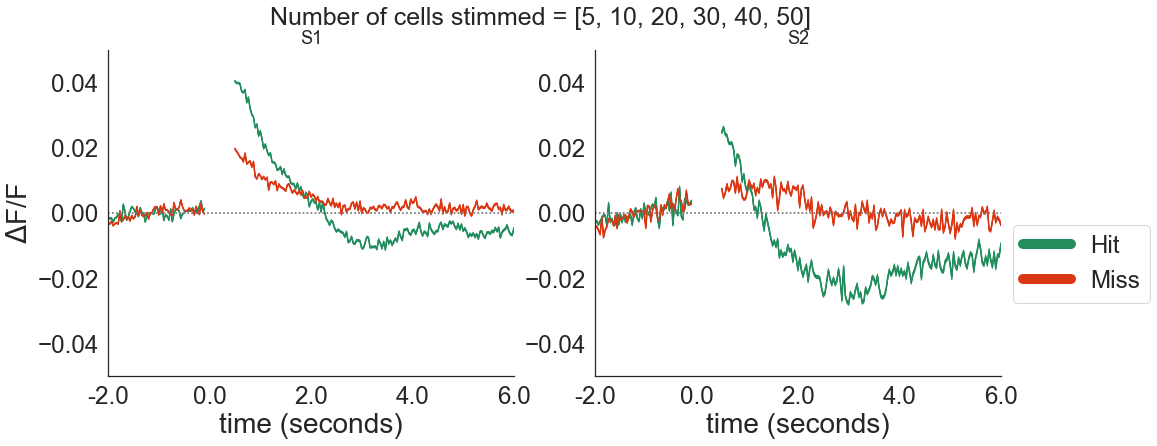

In [40]:
# for n_cells in [[5,10], [20,30], [40,50], [150]]:
for n_cells in [[5,10,20,30,40,50]]:
    s1_s2_plot(msm, n_cells)

In [41]:

pal = sns.color_palette()
print(pal.as_hex())
pal

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]